# CE-40959: Deep Learning

# HW3. Part 1. MLP in Tensorflow (25 points)

### Deadline:   16 Farvardin

In [1]:
# importing modules
from utils import load_data
from models import Dense
from train import train
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# The following two lines let us reload external modules in the notebook
%load_ext autoreload
%autoreload 2

# Data Description and Loading Data

On this notebook, we are going to work on farsi OCR dataset. As its name implies, it is like famous **MNIST** dataset but it consists of images of handwritten digits in farsi. Each instance of this dataset is 32 * 32 gray-scale image. It is totally composed of 80000 instances. After loading this data, let's plot some images in order to see how they look like.

Train, validation and test sets are loaded using a method in `utils.py`. Training set includes 0.7 of the whole dataset and test set just has 0.1 of it. Rest is assigned as validation set.

**Note**: Images are flattened that's why their size is 1024 = 32 * 32.

In [2]:
x_train, y_train, x_validation, y_validation, x_test, y_test = load_data()

Loading the whole dataset...


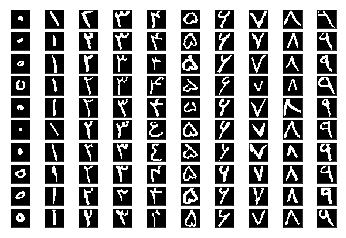

In [3]:
num_sample = 10
num_class = 10
fig, ax = plt.subplots(nrows=num_sample, ncols=num_class)

for i in range(num_class):
    class_i_images = [x_train[k] for k in range(x_train.shape[0]) if y_train[k][i] == 1]
    for j in range(num_sample):
        ax[j, i].get_xaxis().set_visible(False)
        ax[j, i].get_yaxis().set_visible(False)
        ax[j, i].imshow(class_i_images[j].reshape((32, 32)))

# Setting Flags
Tensorflow has the option of setting of some flags which should be defined once and can be used in any file later.

Here we define flags for
1. `learning_rate`: Shows the initial learning rate in optimization process.

2. `num_epoch`: The total number of epochs for training process.

3. `dropout`: The rate by which units are dropped in network.

4. `weight_decay`: The coeffecient of L2 Loss term in total Loss function.

5. `batch_size`: Size of each batch given to model.

6. `early_stopping`: A great method in order to prevent overfitting is to check how loss function changes over validation set as training goes on. If within a window of a specific size the loss function shows an upward movement then it may be the sign of overfitting. Consequenltly, training process should be stopped.

In [4]:
flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('f', '', 'kernel')
flags.DEFINE_float('learning_rate', 0.001, 'Initial learning rate.')
flags.DEFINE_integer('num_epoch', 20, 'Number of epochs to train.')
flags.DEFINE_float('dropout', 0., 'Dropout rate (1 - keep probability).')
flags.DEFINE_float('weight_decay', 0., 'Weight for L2 loss')
flags.DEFINE_integer('batch_size', 100, 'Size of batch')
flags.DEFINE_integer('early_stopping', 5, 'Window size of early stopping')

# Defining Initializers

In the following cell we are importing some intializers which are defined in `utils.py`. Based on their explanation, you have to complete their code in `utils.py` and then import them.

In [5]:
from utils import glorot_initializer, zero_initializer, normal_initializer

# Developing MLP Model

`Dense` model is defined as a python class in `models.py`. Its constructor receives as input followings:

1. num_hidden: Number of hidden units and output units.
2. weight_initializer: Function used for initializing weights
3. bias_initializer: Function used for initializing biases
4. act: Activation function used for hidden layers
5. logging: This is a boolean showing whether the model saves log of weights and biases for later visualization using tensorboard.
6. stddev: Standard deviation in case of having normal initializer for weights of layers.

You have to complete some parts of `__init__`, `_loss`, `_accuracy`, `_log_vars` and `_build` methods in this class.

There is also another python file `layers.py` consists of the class `DenseLayer`. The arguments of its constructor are:
1. input_dim: Dimension of input to layer
2. output_dim: Dimension of output of layer
3. act: Activation function of layer
4. weight_initializer: Function used for initializing weights
5. bias_initializer: Function used for initializing biases
6. stddev: Standard deviation in case of having normal initializer for weights of the layer.

Some part of `__call__` method of is left for you to complete.

**Note**: It is necessary to complete aforementioned python files before moving forward to following cells.

# Experimenting on features of an MLP

In the rest of this notebook, some experiments should be done on different setting like regularization, activation function, number of layers, etc combined with some visualizations.

## Different activation functions

On the following cell you have to define a model with number of hidden units 200, 100, 50, 10. Note that the outputs of last 10 units, after which a softmax function is applied, act as scores for 10 class of digits in data.

You also have to use uniform glorot initializer and zero initializer for weights and biases, respectively.

The last point here is that we are using **sigmoid** as activation function of all layers.

Later, we will apply another one and observe its difference

In [6]:
num_hidden = [200, 100, 50, 10]
model = Dense(num_hidden=[200, 100, 50, 10],
              weight_initializer=glorot_initializer,
              bias_initializer=zero_initializer,
              act=tf.nn.sigmoid,
              logging=True)

1
<tf.Variable 'Variable:0' shape=(200,) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1024, 200) dtype=float32_ref> Tensor("Placeholder:0", shape=(?, 1024), dtype=float32)
2
<tf.Variable 'Variable_2:0' shape=(100,) dtype=float32_ref> <tf.Variable 'Variable_3:0' shape=(200, 100) dtype=float32_ref> Tensor("Sigmoid:0", shape=(?, 200), dtype=float32)
3
<tf.Variable 'Variable_4:0' shape=(50,) dtype=float32_ref> <tf.Variable 'Variable_5:0' shape=(100, 50) dtype=float32_ref> Tensor("Sigmoid_1:0", shape=(?, 100), dtype=float32)
4
<tf.Variable 'Variable_6:0' shape=(10,) dtype=float32_ref> <tf.Variable 'Variable_7:0' shape=(50, 10) dtype=float32_ref> Tensor("Sigmoid_2:0", shape=(?, 50), dtype=float32)


After defining the model we need to trigger training process by using the code partly prepared in `train.py`. After filling required lines run the following cell to start training.
In this file some writers are defined which are later used for plotting visualizations in tensorboard framework. Summary information defined as scalars (like loss) and histograms (like weights) are saved by this writers in `logs` folder near existing files. More specifically, for each model another folder whose name came from `log_file` variable is created.

Furthermore, when you define a session using `with`, the session is just restricted to its following context and can not be used in outer scope.

In [7]:
with tf.Session() as sess:
    log_file = str(model.act.__name__)
    train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)

Epoch 1: train loss=2.315, train acc=0.100

Epoch 2: train loss=2.301, train acc=0.138

Epoch 3: train loss=2.298, train acc=0.176

Epoch 4: train loss=2.297, train acc=0.181

Epoch 5: train loss=2.296, train acc=0.194

Epoch 6: train loss=2.294, train acc=0.211

Epoch 7: train loss=2.293, train acc=0.234

Epoch 8: train loss=2.292, train acc=0.257

Epoch 9: train loss=2.291, train acc=0.282

Epoch 10: train loss=2.290, train acc=0.305

Epoch 11: train loss=2.289, train acc=0.330

Epoch 12: train loss=2.288, train acc=0.355

Epoch 13: train loss=2.286, train acc=0.379

Epoch 14: train loss=2.285, train acc=0.402

Epoch 15: train loss=2.284, train acc=0.425

Epoch 16: train loss=2.283, train acc=0.445

Epoch 17: train loss=2.281, train acc=0.465

Epoch 18: train loss=2.280, train acc=0.484

Epoch 19: train loss=2.279, train acc=0.501

Epoch 20: train loss=2.277, train acc=0.519

Test: average loss=2.278, average accuracy=0.513
-------


**Important Note:** In order to run different computation graphs in the same process, it is compulsary to reset the default graph to a new one which is defined later. To do so, you have to use method `tf.rest_default_graph()` as in the following cell. Otherwise, you will end up with lots of nodes in the default graph of computation.

In [8]:
tf.reset_default_graph()

Let's maintain the same settings but change activation function to **tanh** and run the whole process again.

In [9]:
model = Dense(num_hidden=[200, 100, 50, 10],
              weight_initializer=glorot_initializer,
              bias_initializer=zero_initializer,
              act=tf.nn.tanh,
              logging=True)
with tf.Session() as sess:
    log_file = str(model.act.__name__)
    train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)
tf.reset_default_graph()

1
<tf.Variable 'Variable:0' shape=(200,) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1024, 200) dtype=float32_ref> Tensor("Placeholder:0", shape=(?, 1024), dtype=float32)
2
<tf.Variable 'Variable_2:0' shape=(100,) dtype=float32_ref> <tf.Variable 'Variable_3:0' shape=(200, 100) dtype=float32_ref> Tensor("Tanh:0", shape=(?, 200), dtype=float32)
3
<tf.Variable 'Variable_4:0' shape=(50,) dtype=float32_ref> <tf.Variable 'Variable_5:0' shape=(100, 50) dtype=float32_ref> Tensor("Tanh_1:0", shape=(?, 100), dtype=float32)
4
<tf.Variable 'Variable_6:0' shape=(10,) dtype=float32_ref> <tf.Variable 'Variable_7:0' shape=(50, 10) dtype=float32_ref> Tensor("Tanh_2:0", shape=(?, 50), dtype=float32)
Epoch 1: train loss=1.174, train acc=0.778

Epoch 2: train loss=0.828, train acc=0.834

Epoch 3: train loss=0.667, train acc=0.858

Epoch 4: train loss=0.571, train acc=0.872

Epoch 5: train loss=0.507, train acc=0.883

Epoch 6: train loss=0.460, train acc=0.891

Epoch 7: train loss=0.423, train ac

---

# Question 1
Compare `tanh` and `sigmoid` based on above results. Explain your observation from the visualizations produced by tensorboard.

---

## Different Initializations

Next we want to see the effect of aforementioned initializers.

At first we use zero initializer both for biases and weights. By doing so, specially for weight initialization, the network will get in trouble with breaking the symmetry.

In [10]:
model = Dense(num_hidden=[200, 50, 10],
              weight_initializer=zero_initializer,
              bias_initializer=zero_initializer,
              act=tf.nn.sigmoid,
              logging=True)

with tf.Session() as sess:
    log_file = str(model.act.__name__) + "_" + str(model.weight_initializer.__name__)
    train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)
tf.reset_default_graph()    

1
<tf.Variable 'Variable:0' shape=(200,) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1024, 200) dtype=float32_ref> Tensor("Placeholder:0", shape=(?, 1024), dtype=float32)
2
<tf.Variable 'Variable_2:0' shape=(50,) dtype=float32_ref> <tf.Variable 'Variable_3:0' shape=(200, 50) dtype=float32_ref> Tensor("Sigmoid:0", shape=(?, 200), dtype=float32)
3
<tf.Variable 'Variable_4:0' shape=(10,) dtype=float32_ref> <tf.Variable 'Variable_5:0' shape=(50, 10) dtype=float32_ref> Tensor("Sigmoid_1:0", shape=(?, 50), dtype=float32)
Epoch 1: train loss=2.303, train acc=0.101

Epoch 2: train loss=2.303, train acc=0.101

Epoch 3: train loss=2.303, train acc=0.101

Epoch 4: train loss=2.303, train acc=0.101

Epoch 5: train loss=2.303, train acc=0.101

Epoch 6: train loss=2.303, train acc=0.101

Epoch 7: train loss=2.303, train acc=0.101

Epoch 8: train loss=2.303, train acc=0.101

Epoch 9: train loss=2.303, train acc=0.101

Epoch 10: train loss=2.303, train acc=0.101

Epoch 11: train loss=2.303, 

***

# Question 2

Use tensorboard visualizations of weights and learning curves (like loss and accuracy) as well to discuss about the issue raised by using zeros initializer for weights.

---

Let's see what is the impact of using normal initializer for weights.

Do not forget to send in standard deviation of gaussain distribution used for sampling weights as an argument to model constructor for all next experiments.

In [11]:
stddev_list = [10, 1, 0.01]
for stddev in stddev_list:
    print('Normal Initializer with stddev: {}'.format(stddev))
    model = Dense(num_hidden=[200, 50, 10],
                  weight_initializer=normal_initializer,
                  bias_initializer=zero_initializer,
                  act=tf.nn.sigmoid,
                  logging=True,
                  stddev=stddev)

    with tf.Session() as sess:
        log_file = str(model.act.__name__) + "_" + str(model.weight_initializer.__name__) + "_" + str(stddev)
        train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)
    tf.reset_default_graph()

Normal Initializer with stddev: 10
1
<tf.Variable 'Variable:0' shape=(200,) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1024, 200) dtype=float32_ref> Tensor("Placeholder:0", shape=(?, 1024), dtype=float32)
2
<tf.Variable 'Variable_2:0' shape=(50,) dtype=float32_ref> <tf.Variable 'Variable_3:0' shape=(200, 50) dtype=float32_ref> Tensor("Sigmoid:0", shape=(?, 200), dtype=float32)
3
<tf.Variable 'Variable_4:0' shape=(10,) dtype=float32_ref> <tf.Variable 'Variable_5:0' shape=(50, 10) dtype=float32_ref> Tensor("Sigmoid_1:0", shape=(?, 50), dtype=float32)
Epoch 1: train loss=71.950, train acc=0.097

Epoch 2: train loss=64.707, train acc=0.098

Epoch 3: train loss=59.131, train acc=0.099

Epoch 4: train loss=54.844, train acc=0.101

Epoch 5: train loss=51.610, train acc=0.103

Epoch 6: train loss=49.099, train acc=0.105

Epoch 7: train loss=47.072, train acc=0.107

Epoch 8: train loss=45.380, train acc=0.108

Epoch 9: train loss=43.956, train acc=0.110

Epoch 10: train loss=42.752, 

---

# Question 3

Use tensorboard visualizations of weights and learning curves (like loss and accuracy) as well to describe differences through training process caused by using different standard deviations.

---

## Different Architectures (layers and units)

Next, we will cast light on the importance of architecture of neural networks (more specifically number of layers and units)

In the next 2 experiments, there is no need to have that much number of epochs like before, so will set to 50. We also use normal initializer for weights with `stddev=1` and `sigmoid` as activation function. The only change is in the number of layers and units.

In the first one we have just one hidden layer comprising 500 units which imposes great computational cost. On the other hand, the second network has one more hidden layer with less number of hidden units. Totally it has less parameters compared with the first network.

In [12]:
FLAGS.num_epoch = 50
num_hidden_list = [[500, 10], [100, 50, 10]]
stddev = 1
for num_hidden in num_hidden_list:
    print('Number of hidden units: ', num_hidden)
    model = Dense(num_hidden=num_hidden,
                  weight_initializer=normal_initializer,
                  bias_initializer=zero_initializer,
                  act=tf.nn.sigmoid,
                  logging=True,
                  stddev=stddev)
    with tf.Session() as sess:
        log_file = str(model.act.__name__) + "_" + str(model.num_hidden)
        train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)
    tf.reset_default_graph()

Number of hidden units:  [500, 10]
1
<tf.Variable 'Variable:0' shape=(500,) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1024, 500) dtype=float32_ref> Tensor("Placeholder:0", shape=(?, 1024), dtype=float32)
2
<tf.Variable 'Variable_2:0' shape=(10,) dtype=float32_ref> <tf.Variable 'Variable_3:0' shape=(500, 10) dtype=float32_ref> Tensor("Sigmoid:0", shape=(?, 500), dtype=float32)
Epoch 1: train loss=11.563, train acc=0.097

Epoch 2: train loss=9.283, train acc=0.156

Epoch 3: train loss=7.617, train acc=0.229

Epoch 4: train loss=6.418, train acc=0.298

Epoch 5: train loss=5.552, train acc=0.360

Epoch 6: train loss=4.910, train acc=0.411

Epoch 7: train loss=4.421, train acc=0.454

Epoch 8: train loss=4.038, train acc=0.490

Epoch 9: train loss=3.732, train acc=0.520

Epoch 10: train loss=3.482, train acc=0.546

Epoch 11: train loss=3.274, train acc=0.568

Epoch 12: train loss=3.099, train acc=0.588

Epoch 13: train loss=2.949, train acc=0.605

Epoch 14: train loss=2.818, trai

---
# Question 4
By using tensorboard visualiztions justify the different outcomes of training the above two neural network architectures.

---

## Regularization

Another important point to consider is applying regularization and being aware of its impact on training and generalization. It could be helpful technique in many cases you can not progress in training.

About the setting, we change the learing rate to 0.0001 and number of epochs back to 100.

In first experiment L2 regularization technique is not applied. However, in rest of them, it is used for penalizing two sets of weights:

1. Weights between input and first hidden layer.
2. Weights between first and second hidden layer.

Another point to mention is that here we use `relu` activation function for all layers.

In [13]:
weight_decay_list = [0., 1e-4, 1e-2]
FLAGS.learning_rate = 0.0001
FLAGS.num_epoch = 100
for weight_decay in weight_decay_list:
    print('Weight decay of: {}'.format(weight_decay))
    FLAGS.weight_decay = weight_decay 
    model = Dense(num_hidden=[256, 128, 10],
                  weight_initializer=glorot_initializer,
                  bias_initializer=zero_initializer,
                  act=tf.nn.relu,
                  logging=True)
    with tf.Session() as sess:
        log_file = str(model.act.__name__) + "_" + str(FLAGS.weight_decay)
        train(x_train, y_train, x_validation, y_validation, x_test, y_test, model, sess, log_file)
    tf.reset_default_graph()

Weight decay of: 0.0
1
<tf.Variable 'Variable:0' shape=(256,) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1024, 256) dtype=float32_ref> Tensor("Placeholder:0", shape=(?, 1024), dtype=float32)
2
<tf.Variable 'Variable_2:0' shape=(128,) dtype=float32_ref> <tf.Variable 'Variable_3:0' shape=(256, 128) dtype=float32_ref> Tensor("Relu:0", shape=(?, 256), dtype=float32)
3
<tf.Variable 'Variable_4:0' shape=(10,) dtype=float32_ref> <tf.Variable 'Variable_5:0' shape=(128, 10) dtype=float32_ref> Tensor("Relu_1:0", shape=(?, 128), dtype=float32)
Epoch 1: train loss=2.243, train acc=0.205

Epoch 2: train loss=2.149, train acc=0.277

Epoch 3: train loss=2.062, train acc=0.359

Epoch 4: train loss=1.980, train acc=0.446

Epoch 5: train loss=1.900, train acc=0.520

Epoch 6: train loss=1.822, train acc=0.579

Epoch 7: train loss=1.745, train acc=0.628

Epoch 8: train loss=1.668, train acc=0.667

Epoch 9: train loss=1.593, train acc=0.699

Epoch 10: train loss=1.519, train acc=0.724

Epoch 11:

Epoch 58: train loss=0.448, train acc=0.890

Epoch 59: train loss=0.443, train acc=0.891

Epoch 60: train loss=0.439, train acc=0.892

Epoch 61: train loss=0.435, train acc=0.892

Epoch 62: train loss=0.431, train acc=0.893

Epoch 63: train loss=0.427, train acc=0.894

Epoch 64: train loss=0.423, train acc=0.895

Epoch 65: train loss=0.420, train acc=0.895

Epoch 66: train loss=0.416, train acc=0.896

Epoch 67: train loss=0.413, train acc=0.897

Epoch 68: train loss=0.410, train acc=0.897

Epoch 69: train loss=0.406, train acc=0.898

Epoch 70: train loss=0.403, train acc=0.899

Epoch 71: train loss=0.400, train acc=0.900

Epoch 72: train loss=0.397, train acc=0.900

Epoch 73: train loss=0.395, train acc=0.901

Epoch 74: train loss=0.392, train acc=0.901

Epoch 75: train loss=0.389, train acc=0.902

Epoch 76: train loss=0.386, train acc=0.903

Epoch 77: train loss=0.384, train acc=0.903

Epoch 78: train loss=0.381, train acc=0.904

Epoch 79: train loss=0.379, train acc=0.905

Epoch 80: 

---
# Question 5
By using visualiztion of learning curves (specially loss curve) try to explain the impact that L2 regularization had on training process.

---

### **Note**: 
So far, some questions were placed between cells of codes and descriptions. 

In addition to **completing the code files**, please send a **report** including your answer to these questions as well. Do not forget to put the diagrams and visualizations needed in each part.